##  Mall Customer Segmentation Using K-Means

####  Introduction
In this exercise, you will implement a machine learning pipeline to segment mall customers into distinct groups using the K-Means clustering algorithm. The Mall Customer Dataset contains information about customer demographics and spending behavior, which will be used to identify patterns and create clusters for better understanding of customer types.

####  Objective:
Based on customer attributes, cluster them into distinct segments that can be used for targeted marketing strategies.

#### Dataset Description:
The dataset can be found at [Kaggle’s dataset repository](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data). It contains 200 entries with the following features:

__Features__

- CustomerID: Unique identifier for each customer (not used in clustering).
- Gender: Gender of the customer (categorical, can be included or excluded).
- Age: Age of the customer (numerical).
- Annual Income (k$): Annual income of the customer in thousand dollars (numerical).
- Spending Score (1-100): Score assigned by the mall based on customer behavior and spending patterns (numerical).


  
---

## ↓ ↓ Dive into coding below and have fun (◍•ᴗ•◍) ↓ ↓

**Follow the tasks below to perform the usual machine learning workflow similar to previous exercise to train your K-means modal to cluster the customer into separate groups.**

#### Task 1
Import the necessary libraries used for your ML process and subsequently load the dataset into a pandas dataframe.

Load libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import os 
os.environ["OMP_NUM_THREADS"] = "1"

import warnings
warnings.filterwarnings("ignore")

Load dataset

In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Task 2:
Data exploration - perform any kind of data exploration to learn, familiarize and gain insights on the dataset. 

In [6]:
data.describe().applymap(lambda x: f"{x:.2f}")

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
data["Gender"] = pd.factorize(data["Gender"])[0].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int32
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


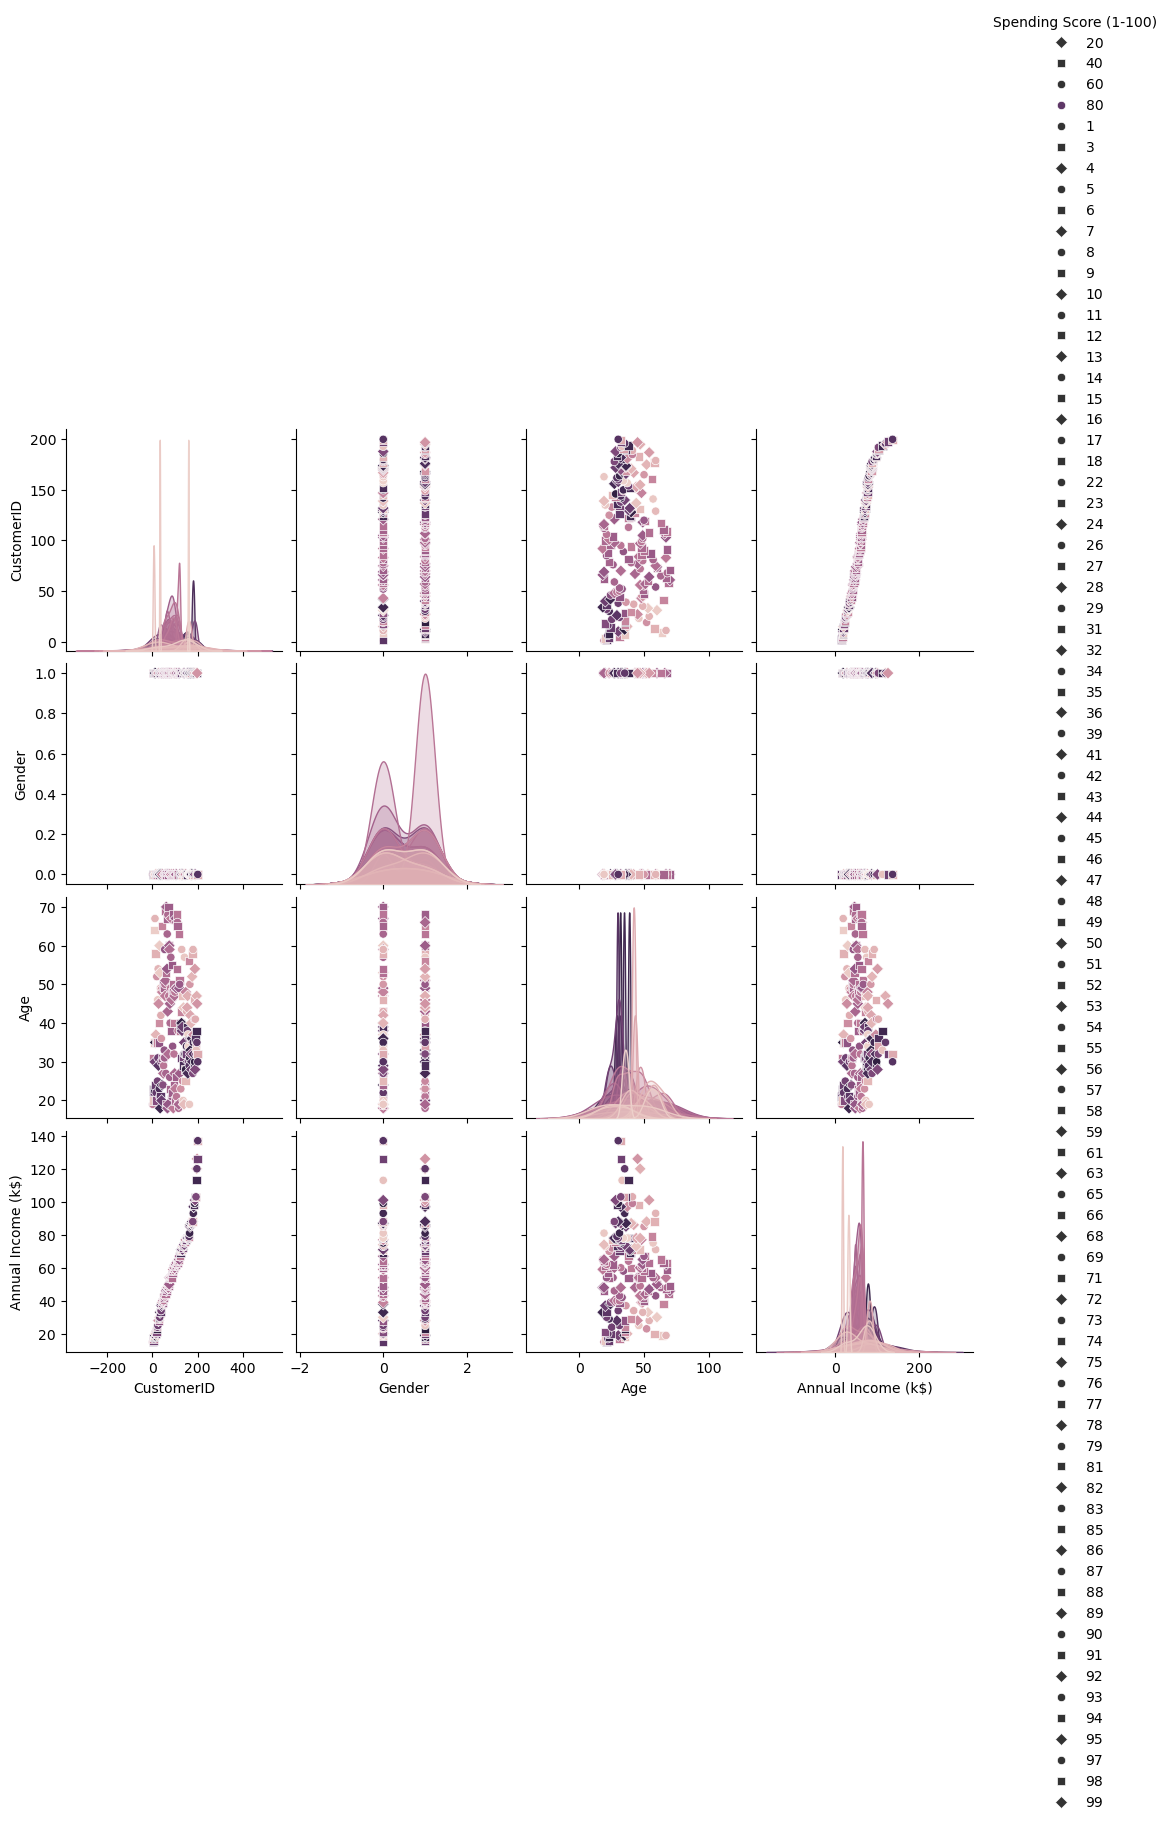

In [18]:
sns.pairplot(data, hue="Spending Score (1-100)", markers=["o", "s", "D"])

Text(0.5, 1.0, 'Correlation Matrix of Mall Customer dataset')

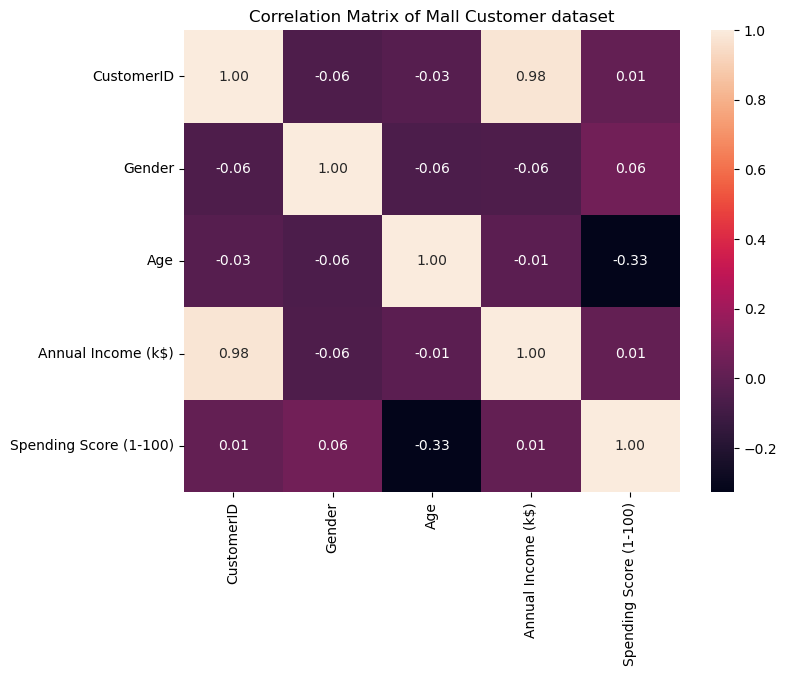

In [22]:
corr_mtx = data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_mtx, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Mall Customer dataset")

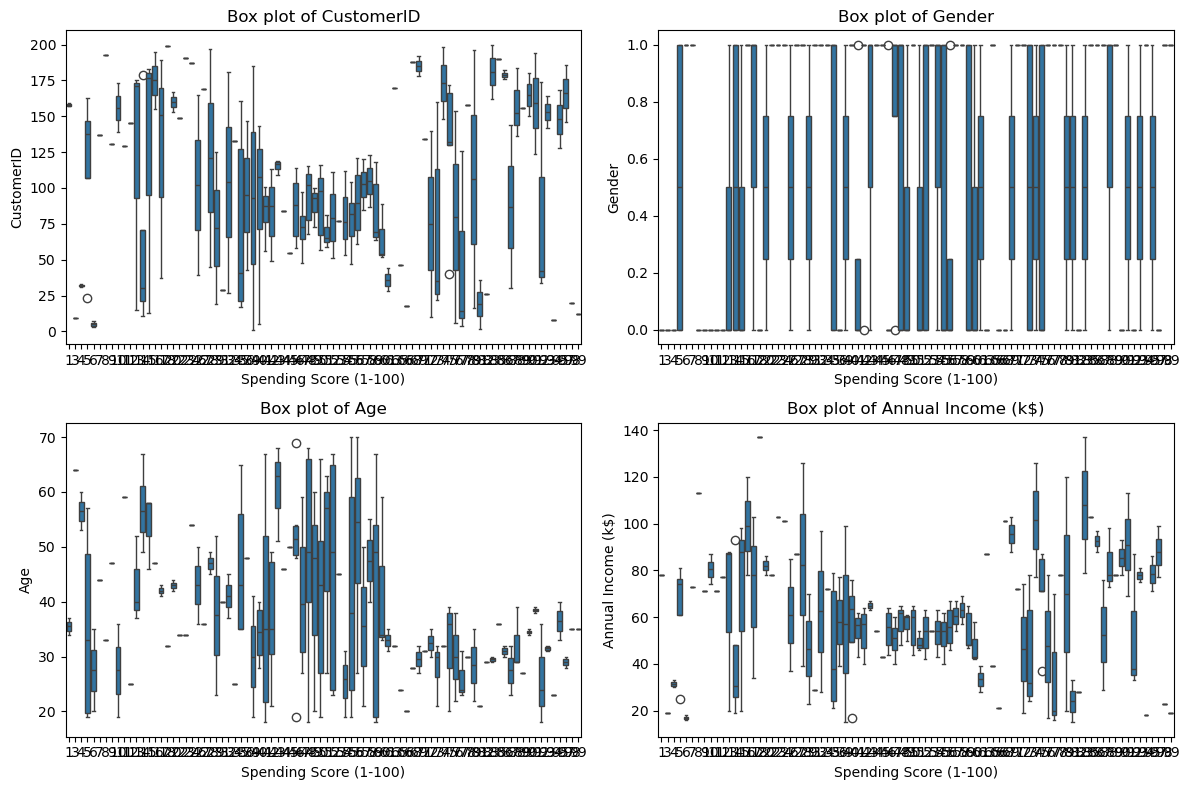

In [24]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Spending Score (1-100)", y=column, data=data)
    plt.title(f"Box plot of {column}")
plt.tight_layout()
plt.show()

#### Task 3
Preprocess the data to prepare it for training.
Perform at least two preprocessing technique on the dataset:
- label encoding
- data standardization

You can further do any preprocessing you deemed necessary.

Label encode the data.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data["Gender"])

data["Gender"] = le.transform(data["Gender"])

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


Scale the data to have a mean of 0 and standard deviation of 1.

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=["Spending Score (1-100)"]))

scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])

scaled_data

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,-1.128152,-1.424569,-1.738999
1,-1.706091,-1.128152,-1.281035,-1.738999
2,-1.688771,0.886405,-1.352802,-1.700830
3,-1.671450,0.886405,-1.137502,-1.700830
4,-1.654129,0.886405,-0.563369,-1.662660
...,...,...,...,...
195,1.654129,0.886405,-0.276302,2.268791
196,1.671450,0.886405,0.441365,2.497807
197,1.688771,-1.128152,-0.491602,2.497807
198,1.706091,-1.128152,-0.491602,2.917671


#### Task 4
Train the model!! First, determine the optimum number of clusters using the elbow method and subsequently train the model.

Determine the best "K" value.

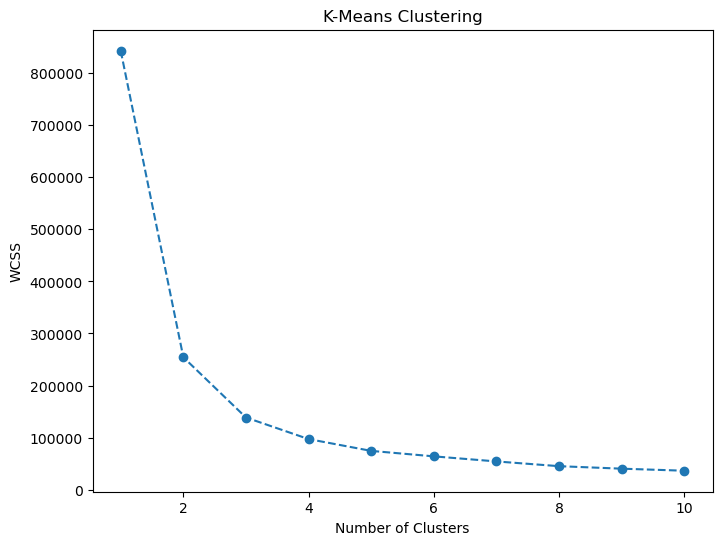

In [32]:
wcss = []

cluster = data.drop(columns=["Spending Score (1-100)"])
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.show()

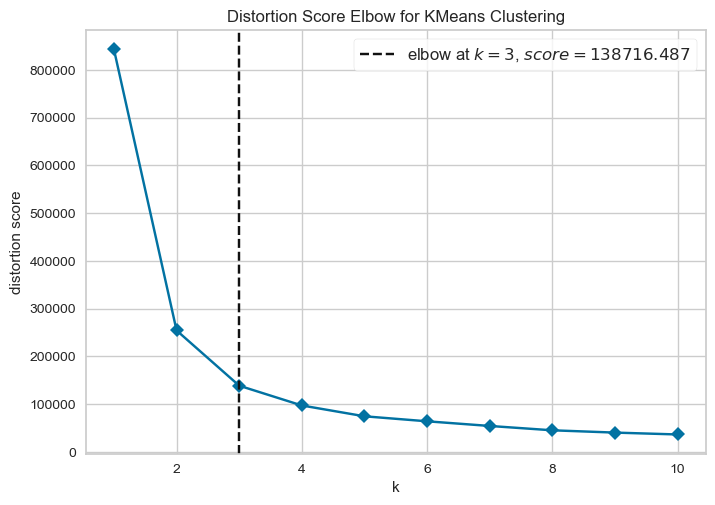

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 11), timings=False)

# Fit the data and visualize
visualizer.fit(cluster)
visualizer.poof()

Let's train the kmeans with k=?

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster)
pred_y = kmeans.predict(cluster)

In [39]:
pred_data = pd.DataFrame(cluster, columns=cluster.columns)
pred_data["KMeans_Cluster"] = pred_y
pred_data
kmeans.cluster_centers_

array([[ 96.98591549,   0.53521127,  43.1971831 ,  59.35211268],
       [166.5       ,   0.54411765,  36.04411765,  88.91176471],
       [ 31.01639344,   0.60655738,  36.91803279,  30.36065574]])

After the model has been trained, we want to understand how income and spending behaviour relate to customer segments, use Annual Income as x-axis and Spending Score as y-axis for the plotting.

Plot the various cluster assigned by the KMeans model along with their centroids.

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster.iloc[pred_y == 0, 0], cluster.iloc[pred_y == 0, 1], s=50, c="red", label="Cluster 0")
plt.scatter(cluster.iloc[pred_y == 1, 0], cluster.iloc[pred_y == 1, 1], s=50, c="blue", label="Cluster 1")
plt.scatter(cluster.iloc[pred_y == 2, 0], cluster.iloc[pred_y == 2, 1], s=50, c="green", label="Cluster 2")

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    marker="X",
    c="black",
    label="Centroids",
)

plt.title("KMeans assigned cluster")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.show()

After plotting the graph, you probably notice some clusters are overlapping each other. Let's visualize in 3D!

Use the `go.Scatter3D` class from `plotly.graph_objects` to plot your graph. Refer to https://www.geeksforgeeks.org/3d-scatter-plot-using-graph_objects-class-in-plotly-python/

Plot for Age vs Spending Score vs Annual Income.